# CDSS Demo

## Initial Imports

In [1]:
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

True

In [2]:
from langchain_core.messages import AIMessage, SystemMessage
from src.custom_config.state_schema import CustomState
from src.graph_compilation import *
from src.llm_config import *

## Run the Virtual Assistant

In [3]:
# Compile the graph
graph = compile_graph()

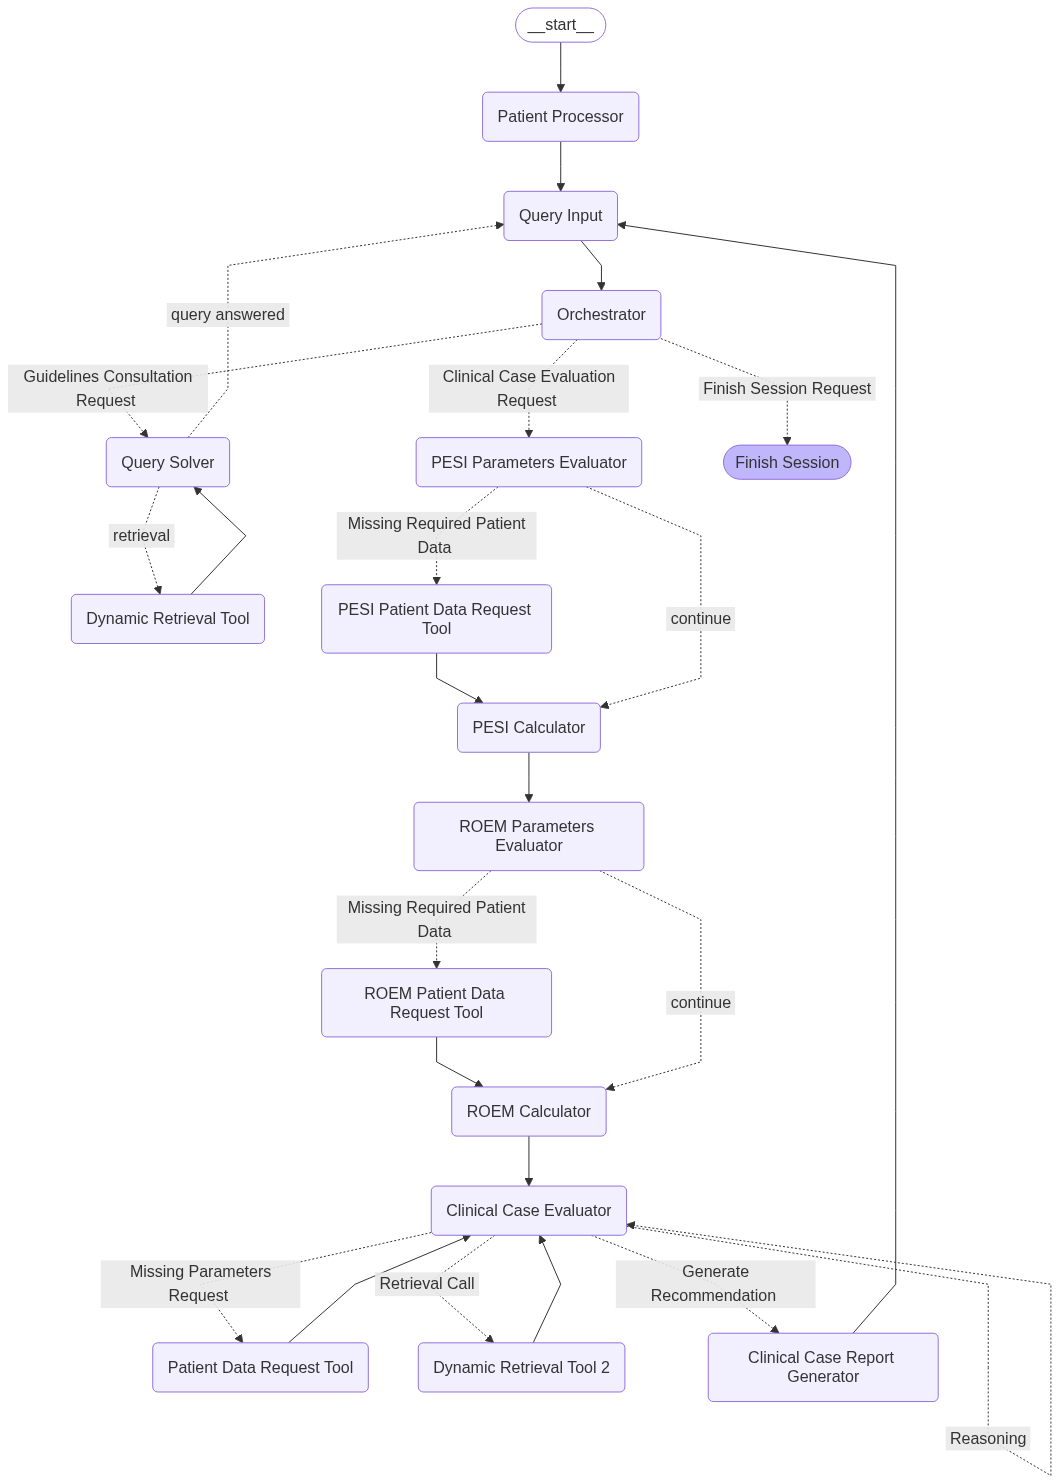

In [ ]:
# from IPython.display import Image, display

# display(Image(graph.get_graph().draw_mermaid_png()))

## Execute the Agentic RAG

In [ ]:
# Specify an ID for the thread
config = {"configurable": {"thread_id": "ab2"}, "recursion_limit": 100}

state = CustomState(
    external_messages=[AIMessage(content="Welcome! How can I assist you today?")],
    messages=[SystemMessage(content="Excel path: data/clinical_cases/clinical_cases.xlsx")],
    patient_data={},
    metrics={},
    clinical_case_evaluation_reports=[],
    guidelines_consultation_responses=[],
    retrieved_information=[],
    retrieval_queries=[],
    finish=False,
    prepare_final_message=False,
)

# Initialize the streaming process
stream = graph.stream(state, config=config, stream_mode="values")

finish = False
# Iterate through the events
while not finish:
    try:
        event = next(stream)

        if event["finish"]:
            print("Session Finished.")
            finish = True
    
    except Exception as e:
        print(f"Error: {e}")
        break



#######################################################
######## CURRENT NODE: PATIENT PROCESSOR NODE #########
#######################################################

Please, select a patient to process:

Available Patients: 1 to 20

 - Patient Patient 1 loaded successfully.
{'Demographic': {'PATIENT': 1, 'Age': 45, 'Sex': 'female', 'Weight (kg)': 65, 'Height (cm)': 165}, 'Patient history': {'Cancer (any type)': 'no', 'Heart failure': 'no', 'COPD': 'no', 'Chronic Cardiopulmonary Disease': 'missing'}, 'Absolute Contraindications for ': {'Haemorragic stroke (previous 6 months)': 'no', 'Unknown-origin ischemic stroke (previous 6 months)': 'no', 'Central nervous system neoplasm': 'no', 'Major trauma (previous 3 weeks)': 'no', 'Major surgery (previous 3 weeks)': 'no', 'Bleeding diathesis': 'no', 'Active bleeding': 'missing'}, 'Relative Contraindications for ': {'Transient ischemic attack (previous 6 months)': 'no', 'Oral anticoagulation': 'no', 'Pregnancy': 'missing', 'First postpartum w

100%|██████████| 8/8 [00:11<00:00,  1.40s/it]


###### Detected Hallucinations: ######

[]

THE ANSWER WAS GENERATED

######################################################
######## CURRENT NODE: QUERY INPUT NODE ##############
######################################################

Please type your query, or write 'Goodbye' if you want to end the session:

###############################################
####### CURRENT NODE: ORCHESTRATOR NODE #######
###############################################

### User Query Detected: Bye ###
### LLM Response: finish session request ###
### Next Action Decided: finish session request ###

########################################################
######## CURRENT NODE: FINISH SESSION NODE #############
########################################################

Session Finished. Thank you for using the system!
Session Finished.


## Display Results

### Messages

#### External Messages

In [5]:
chat_history = event["external_messages"]
for message in chat_history:
    message.pretty_print()

================================== Ai Message ==================================

Welcome! How can I assist you today?
================================== Ai Message ==================================

Please type your query:
================================ Human Message =================================

Which scores can we find in the guidelines to evaluate the risk of the PE on a patient?
================================== Ai Message ==================================

The guidelines present two main clinical prediction rules to evaluate the risk of pulmonary embolism (PE) in patients: the revised Geneva score and the Wells score. Both scores combine clinical symptoms, signs, and predisposing factors to classify patients into categories of clinical or pre-test probability of PE.

1. Revised Geneva Score:
- It includes items such as previous PE or deep vein thrombosis (DVT), heart rate ranges, recent surgery or fracture, hemoptysis, active cancer, unilateral lower-limb pain, signs of

#### Internal Messages

In [6]:
chat_history = event["messages"]
for message in chat_history:
    message.pretty_print()

================================ System Message ================================

Excel path: data/clinical_cases/clinical_cases.xlsx
================================== Ai Message ==================================

Patient data for Patient ID Patient 1 successfully loaded.
================================== Ai Message ==================================

Please type your query, or write 'Goodbye' if you want to end the session:
================================ Human Message =================================

Which scores can we find in the guidelines to evaluate the risk of the PE on a patient?
================================ System Message ================================

Planner decided next action: guidelines consultation request based on user query: "Which scores can we find in the guidelines to evaluate the risk of the PE on a patient?".
================================== Ai Message ==================================

guidelines consultation request
=============================

### Patient Data

In [9]:
event['patient_data']

{'Demographic': {'PATIENT': 1,
  'Age': 45,
  'Sex': 'female',
  'Weight (kg)': 65,
  'Height (cm)': 165},
 'Patient history': {'Cancer (any type)': 'no',
  'Heart failure': 'no',
  'COPD': 'no',
  'Chronic Cardiopulmonary Disease': 'missing'},
 'Absolute Contraindications for ': {'Haemorragic stroke (previous 6 months)': 'no',
  'Unknown-origin ischemic stroke (previous 6 months)': 'no',
  'Central nervous system neoplasm': 'no',
  'Major trauma (previous 3 weeks)': 'no',
  'Major surgery (previous 3 weeks)': 'no',
  'Bleeding diathesis': 'no',
  'Active bleeding': 'missing'},
 'Relative Contraindications for ': {'Transient ischemic attack (previous 6 months)': 'no',
  'Oral anticoagulation': 'no',
  'Pregnancy': 'missing',
  'First postpartum week': 'no',
  'Non compresible puncture sites': 'no',
  'Traumatic resuscitation': 'no',
  'Refractory hypertension (SBP>180mmHg)': 'no',
  'Advanced liver disease': 'no',
  'Infective endocarditis': 'no',
  'Active peptic ulcer': 'no'},
 'Phys

### Retrieved Context

#### Retrieval Queries

In [10]:
event['retrieval_queries']

['risk scores for pulmonary embolism evaluation',
 'clinical prediction rules for pulmonary embolism risk assessment']

#### Retrieved Information

In [11]:
event['retrieved_information']

[[Document(id='7e8aa6cf-f5ad-4ce0-bd85-166634be8a04', metadata={'Section': '4 Diagnosis', 'Subsection': '4.2 Assessment of clinical (pre-test) probability', 'Title': '2019 ESC Guidelines for the diagnosis and management of acute pulmonary embolism developed in collaboration with the European Respiratory Society (ERS)', 'id': '7e8aa6cf-f5ad-4ce0-bd85-166634be8a04', 'source_file': 'Protocolo_v1_images.md'}, page_content='The combination of symptoms and clinical findings with the presence of predisposing factors for VTE allows the classification of patients with suspected PE into distinct categories of clinical or pre-test probability, which correspond to an increasing actual prevalence of confirmed PE. This pre-test assessment can be done either by implicit (empirical) clinical judgement or by using prediction rules. As the post-test (i.e. after an imaging test) probability of PE depends not only on the characteristics of the diagnostic test itself but also on the pretest probability, th

### Patient Clinical Metrics

In [12]:
event['metrics']

{}

### Guidelines Consultation Response

In [23]:
event['guidelines_consultation_responses']

[GuidelinesConsultationResponse(content='The guidelines present two main clinical prediction rules to evaluate the risk of pulmonary embolism (PE) in patients: the revised Geneva score and the Wells score. Both scores combine clinical symptoms, signs, and predisposing factors to classify patients into categories of clinical or pre-test probability of PE.\n\n1. Revised Geneva Score:\n- It includes items such as previous PE or deep vein thrombosis (DVT), heart rate ranges, recent surgery or fracture, hemoptysis, active cancer, unilateral lower-limb pain, signs of deep venous thrombosis, and age over 65 years.\n- The score can be used in a three-level classification (low, intermediate, high probability) or a two-level classification (PE-unlikely, PE-likely).\n- Simplified versions of the score exist to facilitate clinical use.\n- The approximate prevalence of confirmed PE is about 10% in low probability, 30% in intermediate, and 65% in high probability categories.\n\n2. Wells Score:\n- It

In [ ]:
print('Guidelines Consultation Response:\n')
print(f'Query: {event["guidelines_consultation_responses"][0].query}\n')
print(f'Response: {event["guidelines_consultation_responses"][0].content}\n')
print(f'Sources: {event["guidelines_consultation_responses"][0].sources}\n')
print(f'Hallucinations: {event["guidelines_consultation_responses"][0].hallucinations}')

Guidelines Consultation Response:

Query: Which scores can we find in the guidelines to evaluate the risk of the PE on a patient?

Response: The guidelines present two main clinical prediction rules to evaluate the risk of pulmonary embolism (PE) in patients: the revised Geneva score and the Wells score. Both scores combine clinical symptoms, signs, and predisposing factors to classify patients into categories of clinical or pre-test probability of PE.

1. Revised Geneva Score:
- It includes items such as previous PE or deep vein thrombosis (DVT), heart rate ranges, recent surgery or fracture, hemoptysis, active cancer, unilateral lower-limb pain, signs of deep venous thrombosis, and age over 65 years.
- The score can be used in a three-level classification (low, intermediate, high probability) or a two-level classification (PE-unlikely, PE-likely).
- Simplified versions of the score exist to facilitate clinical use.
- The approximate prevalence of confirmed PE is about 10% in low prob

### Clinical Case Evaluation Response

In [11]:
event['clinical_case_evaluation_reports']

[]

In [ ]:
print('Guidelines Consultation Response:\n')
print(f'Query: {event["clinical_case_evaluation_reports"][0].query}\n')
print(f'Response: {event["clinical_case_evaluation_reports"][0].content}\n')
print(f'Sources: {event["clinical_case_evaluation_reports"][0].sources}\n')
print(f'Hallucinations: {event["clinical_case_evaluation_reports"][0].hallucinations}')

## Results Extraction

In [ ]:
# import json
# import os

### Guidelines Consultation 

In [ ]:
# def create_evaluation_dataset_from_excel(excel_path, output_json_path="experimental_results\guidelines_consultation_results\guidelines_consultation_results_dataset.json", sheet_name=None):
#     """
#     Creates a JSON file with evaluation entries by reading data from an Excel file.

#     Args:
#         excel_path (str): Path to the Excel file.
#         output_json_path (str): Path to save the JSON file.
#         sheet_name (str, optional): Name of the sheet to read. If None, reads the first sheet.

#     Returns:
#         list: Created dataset as a list of dictionaries.
#     """

#     try:
#         # Read the Excel file
#         if sheet_name:
#             df = pd.read_excel(excel_path, sheet_name=sheet_name)
#         else:
#             df = pd.read_excel(excel_path)

#         print(f"Excel file read successfully. Rows: {len(df)}")
#         print(f"Available columns: {list(df.columns)}")

#         # Check that the required columns exist
#         required_columns = ['question', 'reference_answer']
#         missing_columns = [col for col in required_columns if col not in df.columns]

#         if missing_columns:
#             raise ValueError(f"Missing columns in Excel: {missing_columns}")

#         # Create the dataset
#         dataset = []

#         # Iterate over each row in the DataFrame
#         for index, row in df.iterrows():
#             # Create the entry with the required structure
#             entry = {
#                 "user_input": str(row["question"]) if pd.notna(row["question"]) else "",
#                 "reference": str(row["reference_answer"]) if pd.notna(row["reference_answer"]) else "",
#                 "retrieved_contexts": [],  # Will remain empty to be filled later
#                 "response": ""  # Will remain empty to be filled later
#             }

#             dataset.append(entry)

#         # Save the dataset to a JSON file
#         with open(output_json_path, "w", encoding="utf-8") as f:
#             json.dump(dataset, f, ensure_ascii=False, indent=4)

#         print(f"Dataset successfully created at: {output_json_path}")
#         print(f"Total entries: {len(dataset)}")

#         return dataset

#     except FileNotFoundError:
#         print(f"Error: File not found {excel_path}")
#         return []
#     except Exception as e:
#         print(f"Error processing the file: {str(e)}")
#         return []

In [ ]:
# excel_file = "experimental_results\guidelines_consultation_results\evaluation_questions\preguntas_gt_tep.xlsx"
# dataset = create_evaluation_dataset_from_excel(
#     excel_path=excel_file
# )

In [ ]:
# # Function to update the dataset later
# def update_dataset_entry(json_path, entry_index, retrieved_contexts=None, response=None):
#     """
#     Updates a specific entry in the dataset with retrieved_contexts and/or response.
    
#     Args:
#         json_path (str): Path to the dataset JSON file
#         entry_index (int): Index of the entry to update
#         retrieved_contexts (list, optional): List of retrieved contexts
#         response (str, optional): Generated response
#     """
#     try:
#         # Read the existing dataset
#         with open(json_path, "r", encoding="utf-8") as f:
#             dataset = json.load(f)
        
#         # Check that the index is valid
#         if entry_index < 0 or entry_index >= len(dataset):
#             print(f"Error: Index {entry_index} out of range. The dataset has {len(dataset)} entries.")
#             return False
        
#         # Update the entry
#         if retrieved_contexts is not None:
#             dataset[entry_index]["retrieved_contexts"] = retrieved_contexts
        
#         if response is not None:
#             dataset[entry_index]["response"] = response
        
#         # Save the updated dataset
#         with open(json_path, "w", encoding="utf-8") as f:
#             json.dump(dataset, f, ensure_ascii=False, indent=4)
        
#         print(f"Entry {entry_index} updated successfully.")
#         return True
        
#     except Exception as e:
#         print(f"Error updating the entry: {str(e)}")
#         return False

In [ ]:
# response = event['guidelines_consultation_responses'][0].content
# retrieved_docs = event['guidelines_consultation_responses'][0].sources

# # Extract page_content from all documents in retrieved_docs
# page_contents = []

# for doc_list in retrieved_docs:
#     for doc in doc_list:
#         page_contents.append(doc.page_content)

# print(f"Total page contents extracted: {len(page_contents)}")
# print(f"First few characters of each page content:")
# for i, content in enumerate(page_contents):
#     print(f"Document {i+1}: {content[:100]}...")

In [ ]:
# update_dataset_entry(
#     json_path="experimental_results\guidelines_consultation_results\guidelines_consultation_results_dataset.json",
#     entry_index=0, # Adjust the index as needed
#     retrieved_contexts=page_contents,
#     response=response
# )

### Clinical Case Evaluation Report 

In [ ]:
# def save_recommendations_to_json(clinical_case_evaluation_report, filename="experimental_results/clinical_case_evaluation_results/clinical_case_evaluation_dataset.json"):
#     """
#     Save the recommendation object to a JSON file.
#     If the file already exists, append the new recommendation rather than overwriting.
    
#     Args:
#         recommendation: The recommendation object containing content, sources, query, and hallucinations
#         filename: The name of the file to save the recommendations to
#     """
#     # Create a dictionary to store the recommendation data
#     extracted_report = {
#         "content": clinical_case_evaluation_report.content,
#         "query": clinical_case_evaluation_report.query,
#         "hallucinations": clinical_case_evaluation_report.hallucinations,
#         "sources": [
#             {
#                 "content": source.page_content,
#                 "metadata": source.metadata
#             } for source in clinical_case_evaluation_report.sources
#         ]
#     }
    
#     # Check if file already exists
#     if os.path.exists(filename):
#         # Read existing data
#         with open(filename, 'r', encoding='utf-8') as f:
#             try:
#                 existing_data = json.load(f)
#                 if not isinstance(existing_data, list):
#                     # Convert to list if not already
#                     existing_data = [existing_data]
#             except json.JSONDecodeError:
#                 # If file is empty or invalid JSON, start with empty list
#                 existing_data = []
        
#         # Append new recommendation
#         existing_data.append(extracted_report)
#         data_to_save = existing_data
#     else:
#         # Create new file with recommendation as first item in a list
#         data_to_save = [extracted_report]
    
#     # Save the updated data to the JSON file
#     with open(filename, 'w', encoding='utf-8') as f:
#         json.dump(data_to_save, f, indent=4, ensure_ascii=False)
    
#     print(f"Recommendation successfully saved to {filename} (total: {len(data_to_save)})")


In [ ]:
# save_recommendations_to_json(event['clinical_case_evaluation_reports'][0])